# Raster Processing with GDAL



In [7]:
import sys
try:
    from osgeo import ogr, osr, gdal
    print("Installed!") 
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')

Installed!


## Open a dataset



In [4]:
import os

dir = 'data'
dir = r'/home/user/Handouts/exercise_data_raster'

dsPath = os.path.join(dir, '2014.tif')
dsPath

'/home/user/Handouts/exercise_data_raster/2014.tif'

In [10]:
raster = gdal.Open(dsPath)
if raster is not None:
    print("File was opened!")
else:
    print("Could not open the file!")

File was opened!


## Access to metadata



In [11]:
print("Raster size X:", raster.RasterXSize)

Raster size X: 300


In [12]:
raster.RasterYSize

350

In [13]:
raster.Min

365

In [14]:
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [15]:
raster.GetProjection()

'PROJCS["Amersfoort / RD New",GEOGCS["Amersfoort",DATUM["Amersfoort",SPHEROID["Bessel 1841",6377397.155,299.1528128,AUTHORITY["EPSG","7004"]],TOWGS84[565.4171,50.3319,465.5524,-0.398957,0.343988,-1.8774,4.0725],AUTHORITY["EPSG","6289"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4289"]],PROJECTION["Oblique_Stereographic"],PARAMETER["latitude_of_origin",52.1561605555556],PARAMETER["central_meridian",5.38763888888889],PARAMETER["scale_factor",0.9999079],PARAMETER["false_easting",155000],PARAMETER["false_northing",463000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","28992"]]'

In [17]:
g  = raster.GetGeoTransform()
print("top left x: ", g[0])
print("top left y:", g[3])
print("Scale x:", g[1])
print("Scale y:", g[5])
print("Rotation 1:", g[2])
int("Rotation 2:", g[4])

top left x:  0.0
top left y: 640000.0
Scale x: 1000.0
Scale y: -1000.0
Rotation 1: 0.0
Rotation 2: 0.0


In [1]:
def min_pixel_value(raster, n):
    """
    Return the minimum of pixel values in band number `n` from the `raster`.
    To see the methods that a band object provide, see https://gdal.org/python/index.html
    """
    # YOUR CODE HERE
    band = raster.GetRasterBand(n)
    stat = band.GetStatistics(False, True)
    print(stat)
    return stat[0]


def std_pixel_value(raster, n):
    """
    Return the standard deviation of pixel values in band number `n` from the `raster`.
    To see the methods that a band object provide, see https://gdal.org/python/index.html
    """
    # YOUR CODE HERE
    band = raster.GetRasterBand(n)
    stat = band.GetStatistics(False, True)
    print(stat)
    return stat[3]

## Convert to NumPy



In [23]:
from osgeo import gdal_array as gdarr

band = raster.GetRasterBand(1)
offset_x = 100
offset_y = 150
win_width = 10
win_height = 10

px = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)
print(px.shape)
print(px.dtype)
print(px.ndim)

(10, 10)
float32
2


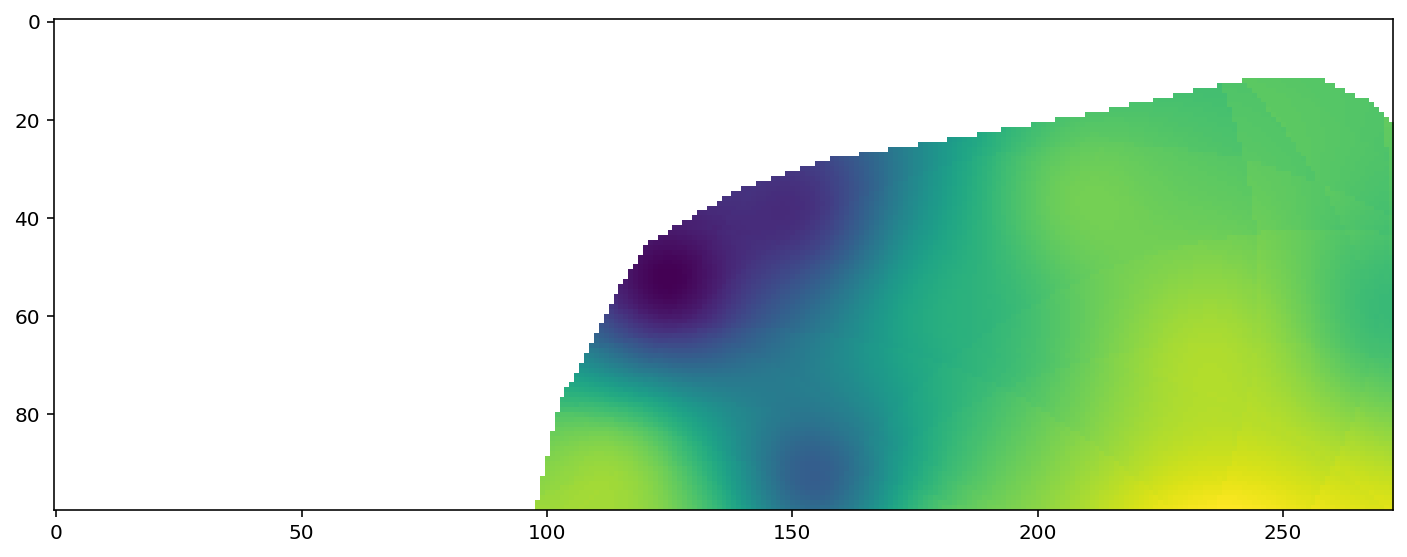

In [30]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt

band = raster.GetRasterBand(1)
offset_x = 0
offset_y = 0
win_width = 273
win_height = 100

arr = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)

arr[arr == -9999] = None

plt.imshow(arr)

In [46]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt

offset_x = 0
offset_y = 0
win_width = 273
win_height = 100

arr = gdarr.DatasetReadAsArray(raster, offset_x, offset_y, win_width, win_height)

print(arr.shape)
print(arr.ndim)

first_band = arr[0]
print(first_band.shape)
print(first_band.ndim)

# first_band[first_band == -9999] = None

# plt.imshow(arr)

(365, 100, 273)
3
(100, 273)
2


## Save the raster



In [47]:
# 1- Create a driver
driver = raster.GetDriver()
# or
# driver = dgal.GetDriverByName('GTiff')

# 2- Create a new raster
new_raster = driver.Create('new.tiff', win_width, win_height, 1, gdal.GDT_Float32)


# C3- Assign a projection
prj = raster.GetProjection()
new_raster.SetProjection(prj)

# 4- Set the GeoTransform
t = raster.GetGeoTransform()
new_raster.SetGeoTransform(t)

band = new_raster.GetRasterBand(1)
band.WriteArray(first_band)
band.SetNoDataValue(-9999)
band.FlushCache()
band = None

new_raster = None
print('Finish')

Finish
